In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Dataset
documents = [
    "This movie is fantastic, I loved every moment.",
    "Absolutely terrible, a complete waste of time.",
    "Amazing acting, truly a masterpiece.",
    "The acting was poor, and the plot made no sense.",
    "The plot was engaging and the visuals were stunning.",
    "Horrible direction, couldn't sit through the entire movie.",
    "A brilliant performance, highly recommend!",
    "Disappointing and boring, don't recommend it.",
    "One of the best movies I've seen in a while.",
    "Worst movie of the year, truly awful.",
    "Excellent direction, kept me hooked till the end.",
    "The characters were one-dimensional and uninteresting.",
    "Heartwarming story and great acting.",
    "A predictable and uninspired story.",
    "Absolutely loved the characters and storyline.",
    "Painfully slow pacing, almost fell asleep.",
    "The soundtrack was amazing, it made the movie perfect.",
    "The visuals were okay, but the story was lacking.",
    "Incredible visuals and a moving story.",
    "Not worth watching, save your time and money.",
    "An unforgettable experience, a must-watch.",
    "The dialogue was cheesy and unrealistic.",
    "Superb writing and exceptional performances.",
    "The performances felt forced and unnatural.",
    "The pacing was perfect, not a dull moment.",
    "Terrible execution of a potentially good idea.",
    "Highly entertaining, had a great time watching it.",
    "The editing was choppy and the scenes felt disconnected.",
    "A truly inspiring and uplifting film.",
    "An absolute disaster of a film, don't bother.",
    "The chemistry between the characters was perfect.",
    "Lackluster and completely forgettable.",
    "Loved the way the story unfolded, truly captivating.",
    "The movie was a mess, didn't make any sense.",
    "A fantastic movie that keeps you thinking afterward.",
    "Cringeworthy moments throughout the entire film.",
    "Emotional, powerful, and brilliantly executed.",
    "Felt like a low-budget attempt, very disappointing.",
    "A feel-good movie with a strong message.",
    "It tried to be deep but ended up being pretentious.",
    "The plot was brilliant and kept me intrigued.",
    "The movie was dull and overly predictable.",
    "A fantastic story with lovable characters.",
    "The action sequences were poorly executed.",
    "An inspiring movie that left me feeling hopeful.",
    "A confusing and disjointed narrative.",
    "The humor was on point, a delightful watch.",
    "The movie lacked originality and depth.",
    "A cinematic gem, truly breathtaking.",
    "A tedious watch with little redeeming quality."
]

labels = [
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0
]

In [2]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.3, random_state=42)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorize the data
#vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
#X_train_vec = vectorizer.fit_transform(X_train)
#X_test_vec = vectorizer.transform(X_test)

In [4]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
X_train_vec = model.encode(X_train)
X_test_vec = model.encode(X_test)

In [5]:
# Train the classifier
classifier = LogisticRegression(C=0.1, random_state=42)
classifier.fit(X_train_vec, y_train)

LogisticRegression(C=0.1, random_state=42)

In [6]:
# Evaluate the model
y_pred = classifier.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.64      1.00      0.78         7

    accuracy                           0.73        15
   macro avg       0.82      0.75      0.72        15
weighted avg       0.83      0.73      0.72        15


In [7]:
pip install umap-learn matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Obtaining dependency information for umap-learn from https://files.pythonhosted.org/packages/3c/8f/671c0e1f2572ba625cbcc1faeba9435e00330c3d6962858711445cf1e817/umap_learn-0.5.7-py3-none-any.whl.metadata
  Obtaining dependency information for pynndescent>=0.5 from https://files.pythonhosted.org/packages/d2/53/d23a97e0a2c690d40b165d1062e2c4ccc796be458a1ce59f6ba030434663/pynndescent-0.5.13-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 893.0 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


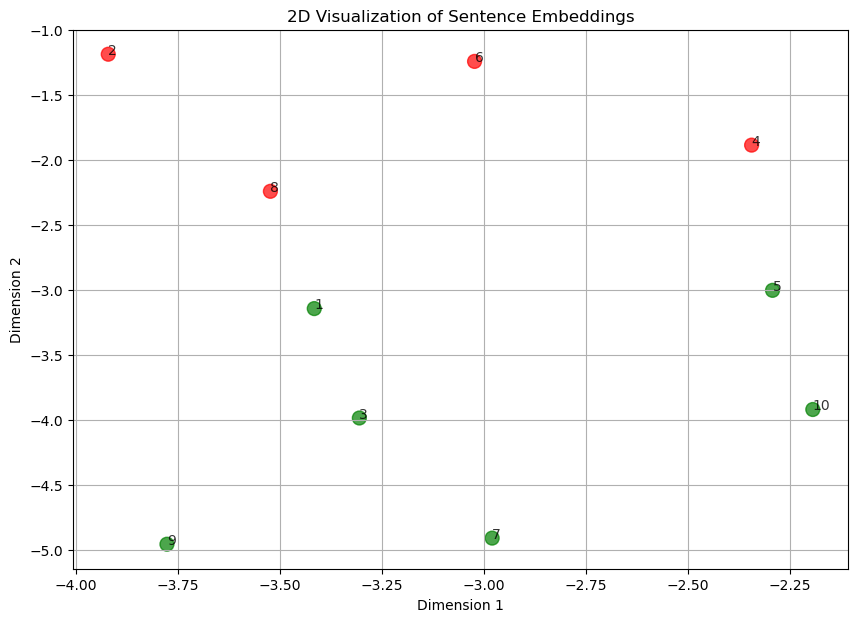

In [8]:
import matplotlib.pyplot as plt
import umap
from sentence_transformers import SentenceTransformer

# Load the pre-trained embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Dataset
documents = [
    "This movie is fantastic, I loved every moment.",
    "Absolutely terrible, a complete waste of time.",
    "Amazing acting, truly a masterpiece.",
    "The acting was poor, and the plot made no sense.",
    "The plot was engaging and the visuals were stunning.",
    "Horrible direction, couldn't sit through the entire movie.",
    "Superb writing and exceptional performances.",
    "Cringeworthy moments throughout the entire film.",
    "Emotional, powerful, and brilliantly executed.",
    "A cinematic gem, truly breathtaking."
]
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1: Positive, 0: Negative

# Generate embeddings
embeddings = model.encode(documents)

# Reduce dimensions to 2D using UMAP
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine')
embeddings_2d = reducer.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 7))
colors = ['red' if label == 0 else 'green' for label in labels]
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, s=100, alpha=0.7)
for i, doc in enumerate(documents):
    plt.annotate(f"{i+1}", (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=10, alpha=0.8)

plt.title("2D Visualization of Sentence Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()
